# **Project Fundamentals of AIML: Cardio Good Fitness Data Analysis**


## **Context**

Cardio Good Fitness is a leading manufacturer of high-quality treadmills. The company offers three main products: the TM195, the TM498, and the TM798, which is their flagship product. With the rising demand for fitness in the market and an increasing number of competitors, Cardio Good Fitness wants to gain a better understanding of its existing customer profiles in order to develop more targeted marketing and product development strategies. They believe this will allow them to meet the needs and preferences of their customers, increase customer satisfaction, and drive revenue growth.

<br>

## **Objective**

In order to gain insights into its customer profiles, Cardio Good Fitness has collected demographic and product usage information for each of its customers.
We will be majorly focusing on understanding the below aspects –
i) Key characteristics of customers who purchase each product
ii) Usage of product by each group

<br>

## **Data Description**

The data is about customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables-


* Product - The model no. of the treadmill
* Age -  Age of the customer in no of years
* Gender - Gender of the customer
* Education - Education of the customer in no. of years
* Marital Status - Marital status of the customer
* Usage - Avg. number of times the customer wants to use the treadmill every week
* Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
* Income - Income of the customer
* Miles- Miles that a customer expects to run

In [4]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


### Understanding the structure of the data

In [5]:
# Read the data
df = pd.read_csv('D:\Python\Month1\Project_Cardio\CardioGoodFitness.csv')
df.head() 

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [6]:
# copying data to another variable to avoid any changes to original data
cardio = df.copy()

In [7]:
# returns the first 5 rows
cardio.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


### Dataset shape

In [101]:
# Check the shape of the dataset
cardio.shape 

(180, 9)

#### Observations: 
The dataset has 180 rows and 9 columns

### Datatypes of the different columns in the dataset

In [102]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


#### Observations:
* There are 6 numerical columns in the data and 3 object type columns.

* Data column 'Product','Gender' & 'MaritalStatus' are being read as 'Object' type column but it should be in categorical datatype to reduce the memory space.

* Data column 'Fitness' is being read as'integer' type column but it should be in categorical datatype. 


### Convert the data type of the object type variables to the 'categorical' type to reduce memory usage


In [103]:
cardio['Product'] = pd.Categorical(cardio.Product) 
cardio["Gender"] = pd.Categorical(cardio.Gender)
cardio["MaritalStatus"] = pd.Categorical(cardio.MaritalStatus)
cardio["Fitness"] = pd.Categorical(cardio.Fitness)

In [104]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    category
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(4), int64(5)
memory usage: 8.4 KB


### Observations: 
Now the 'object' datatype columns have been changed into 'Category' datatype.

### Checking on missing values in the data

In [105]:
# Checking for missing values in the data
cardio.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

#### Observations: 
No null values in the dataset

### Checking on statistical summary of the data

In [8]:
cardio.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product,180,3,TM195,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,180.0,NaN,NaN,NaN,28.788889,6.943498,18.0,24.0,26.0,33.0,50.0
Gender,180,2,Male,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,180.0,NaN,NaN,NaN,15.572222,1.617055,12.0,14.0,16.0,16.0,21.0
MaritalStatus,180,2,Partnered,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usage,180.0,NaN,NaN,NaN,3.455556,1.084797,2.0,3.0,3.0,4.0,7.0
Fitness,180.0,NaN,NaN,NaN,3.311111,0.958869,1.0,3.0,3.0,4.0,5.0
Income,180.0,NaN,NaN,NaN,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.0,104581.0
Miles,180.0,NaN,NaN,NaN,103.194444,51.863605,21.0,66.0,94.0,114.75,360.0


#### Observations: 
Age       : Age of the customers ranges between 18 to 50 . 50 % of customers belongs to the age 26. 
Average age of customer is close to 75% percentile of the data, indicating a right skew 
Education : Average education is close to 50% and 75% percentile of the data.
Usage     : Usage lies between 2 to 7. Aver
Income    : Income also has a huge spread ranging from 29k to 104k, but the average value is close to the median of the data, which means the data is evenly distributed across this column



## **Exploratory Data Analysis (EDA)**

### **Univariate Analysis**

In [20]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
        
    )  # Add median to the histogram

## Observations on Age

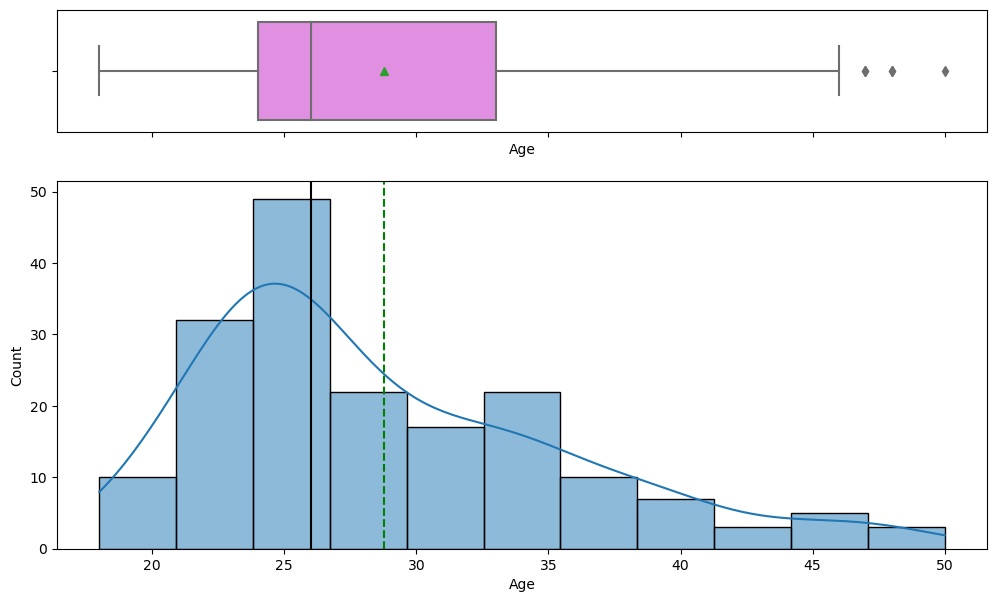

In [21]:
histogram_boxplot(cardio, "Age",kde=True)

Observations: 

* The distribution of Age is highly right skewed
* There are three outliers in this variable. Age greater than 45 is considered as outliners here
* Mean of Age is greater than Mode
* Most of the customers are belongs to the age group between 24-26

## Observations on Education

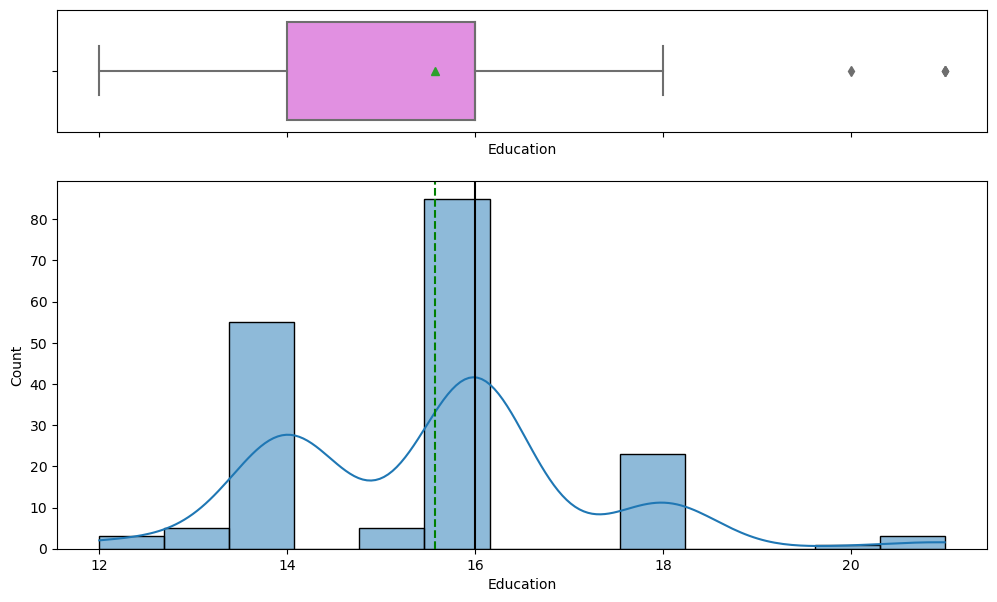

In [37]:
histogram_boxplot(cardio,"Education",kde=True)

### Observations:
* The distribution of Education is bimodal distributed as two modes can be seen in the plot.
* There are two outliners which are education with the years more than 20
* 75% of the customers have the number of education around 16 years.
* Here the median and the 3rd Quartile are considered to be same( 16 years)

## Observations on Usage

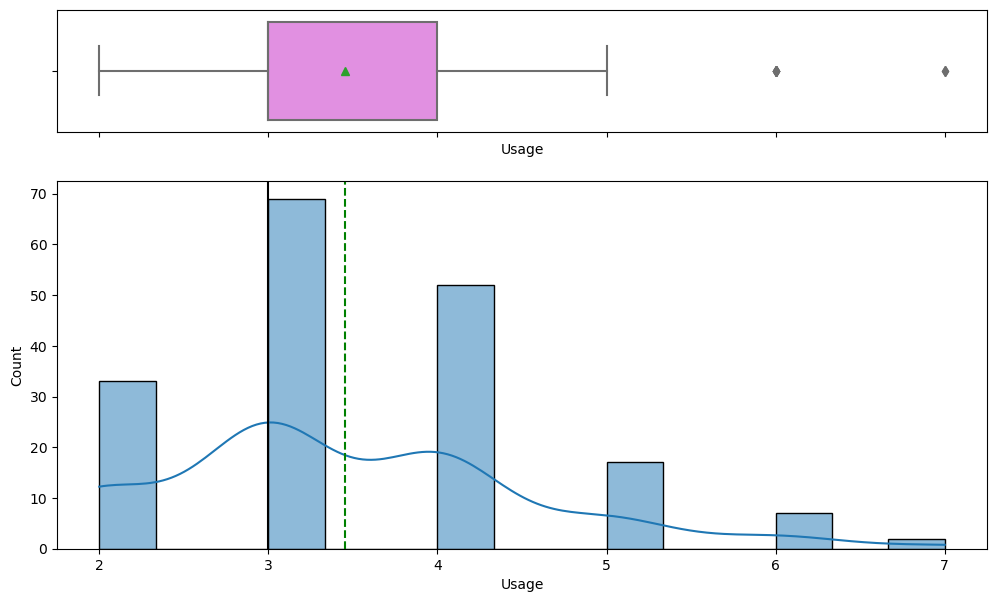

In [43]:
histogram_boxplot(cardio,"Usage",kde=True)

### Observations:
50% of the customers use 3 times per week.
There are two outliners with the usage 6 and 7
Here the Q1 and the median are same (3)

## Observations on Income

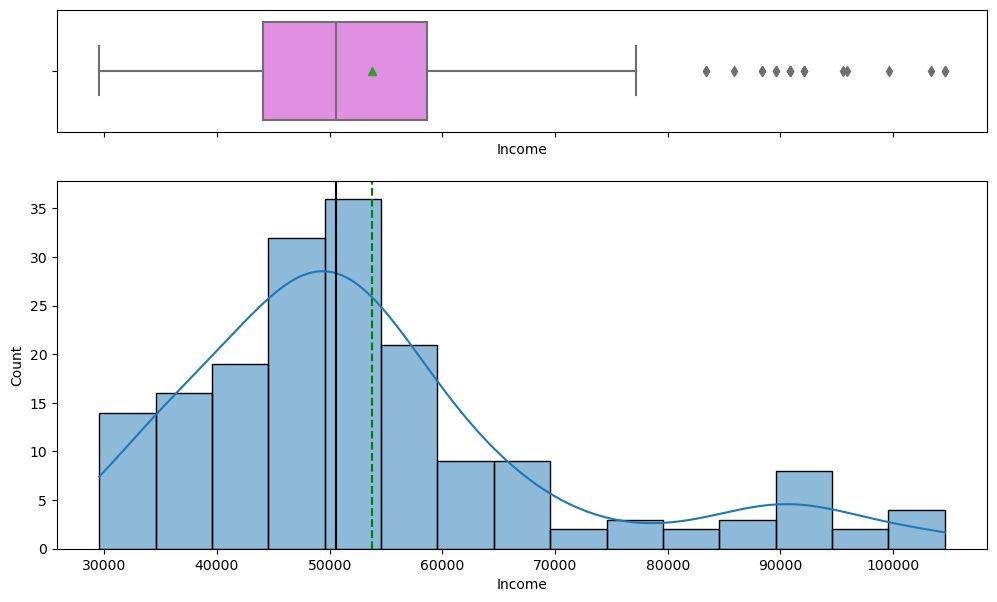

In [44]:
histogram_boxplot(cardio,"Income",kde=True)

### Observations:
* Income is positively skewed distribution
* There are many outliners which are greater than 77000. 
* 50% of the customer earning around 50000

In [60]:
cardio.loc[cardio['Income']>77000]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
159,TM798,27,Male,16,Partnered,4,5,83416,160
160,TM798,27,Male,18,Single,4,3,88396,100
161,TM798,27,Male,21,Partnered,4,4,90886,100
162,TM798,28,Female,18,Partnered,6,5,92131,180
163,TM798,28,Male,18,Partnered,7,5,77191,180
164,TM798,28,Male,18,Single,6,5,88396,150
166,TM798,29,Male,14,Partnered,7,5,85906,300
167,TM798,30,Female,16,Partnered,6,5,90886,280
168,TM798,30,Male,18,Partnered,5,4,103336,160
169,TM798,30,Male,18,Partnered,5,5,99601,150


## Observations on Miles

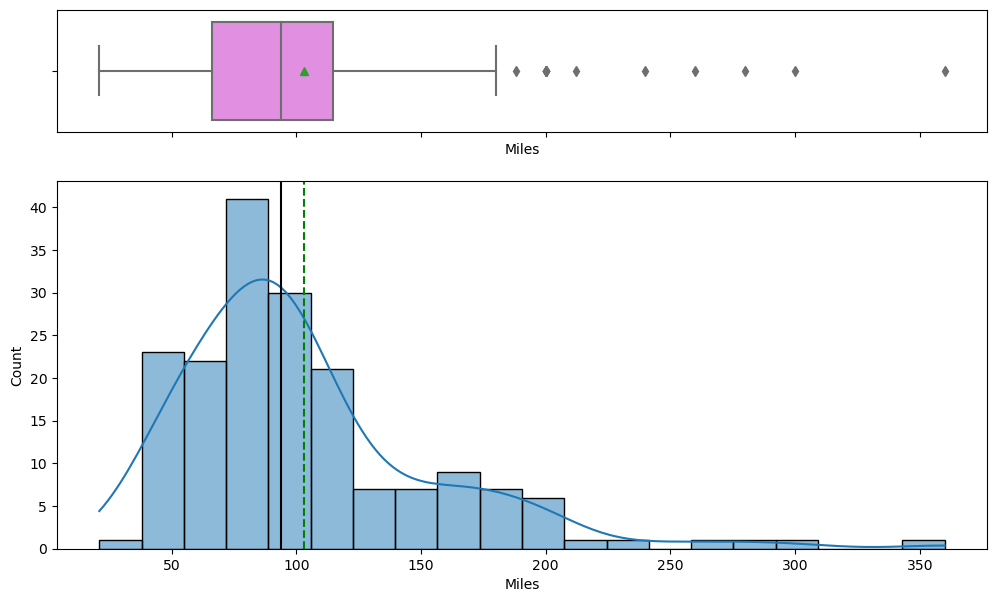

In [58]:
histogram_boxplot(cardio,'Miles',kde=True)

In [63]:
cardio.loc[cardio['Miles']>180
          ]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
23,TM195,24,Female,16,Partnered,5,5,44343,188
84,TM498,21,Female,14,Partnered,5,4,34110,212
142,TM798,22,Male,18,Single,4,5,48556,200
148,TM798,24,Female,16,Single,5,5,52291,200
152,TM798,25,Female,18,Partnered,5,5,61006,200
155,TM798,25,Male,18,Partnered,6,5,75946,240
166,TM798,29,Male,14,Partnered,7,5,85906,300
167,TM798,30,Female,16,Partnered,6,5,90886,280
170,TM798,31,Male,16,Partnered,6,5,89641,260
171,TM798,33,Female,18,Partnered,4,5,95866,200


### Observations:
Right skewed data distribution
It has many outliners with the miles greater than 180



Now, we will be creating barplots for the categorical variables in the dataset -

In [22]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

## Observations on Product

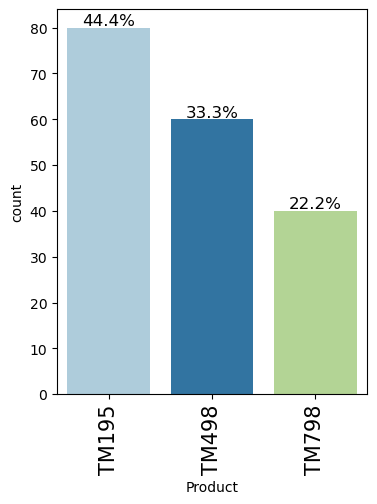

In [23]:
labeled_barplot(cardio, "Product", perc=True)

### Observations:
Most of the customer uses TM195 model

### Observations on Gender

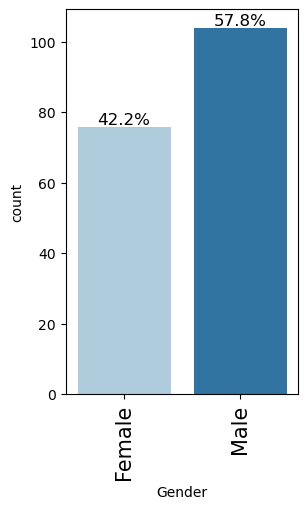

In [24]:
labeled_barplot(cardio,"Gender",perc=True) 

### Observations:
57.8 % of the customers are Male 
Remaining 42.2 % of the customers are female

## Observations on Marital Status

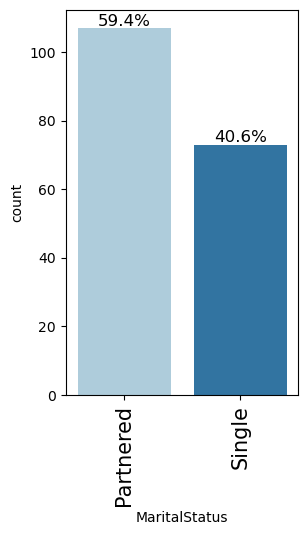

In [25]:
labeled_barplot(cardio,'MaritalStatus',perc=True)

### Observations:
Most of the customers are not single.


## Observations on Fitness

In [115]:
cardio['FitnessRange']=pd.cut(cardio['Fitness'],bins=[0,1,2,3,4,5],labels=['Very Unfit','Unfit','Average','Fit','Very Fit'])
cardio.head()


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,FitnessRange
0,TM195,18,Male,14,Single,3,4,29562,112,Fit
1,TM195,19,Male,15,Single,2,3,31836,75,Average
2,TM195,19,Female,14,Partnered,4,3,30699,66,Average
3,TM195,19,Male,12,Single,3,3,32973,85,Average
4,TM195,20,Male,13,Partnered,4,2,35247,47,Unfit


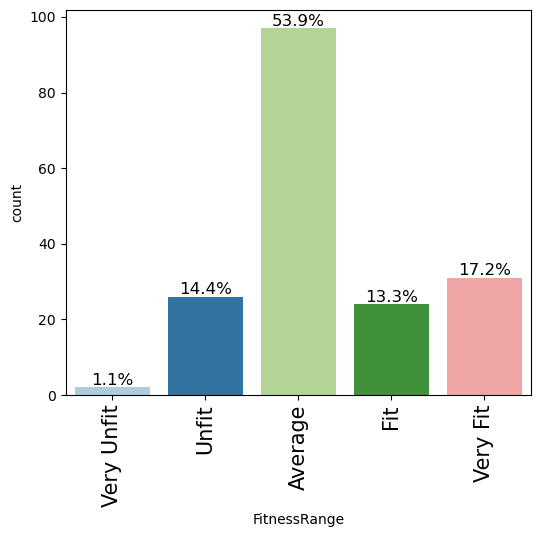

In [116]:
labeled_barplot(cardio,'FitnessRange',perc=True)

### Observations:
Most of the customers are Average Fitnesss

## Observations on Education

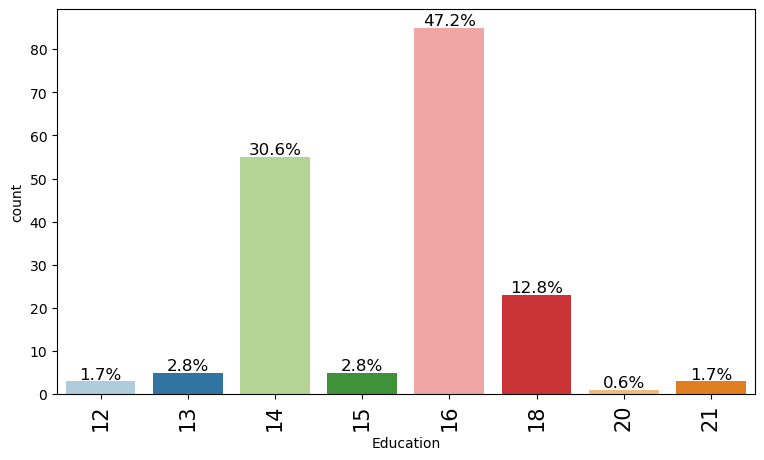

In [27]:
labeled_barplot(cardio,'Education',perc=True)

### Observations:
Most of the customer has the education years as 16

## Observations on Usage

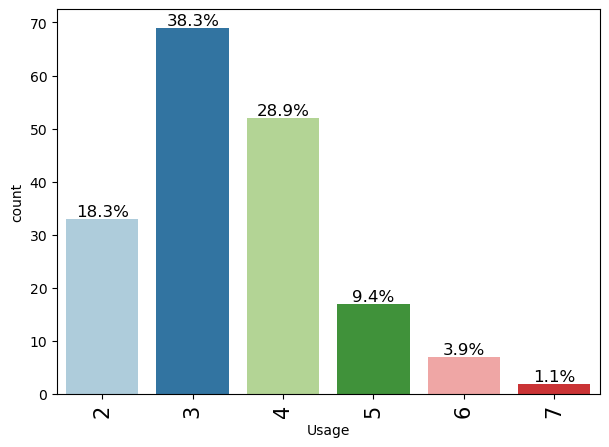

In [29]:
labeled_barplot(cardio,"Usage",perc=True)

### Observations:
Most of the customers use the treadmill 3 times per week

### **Bivariate and Multivariate Analysis**

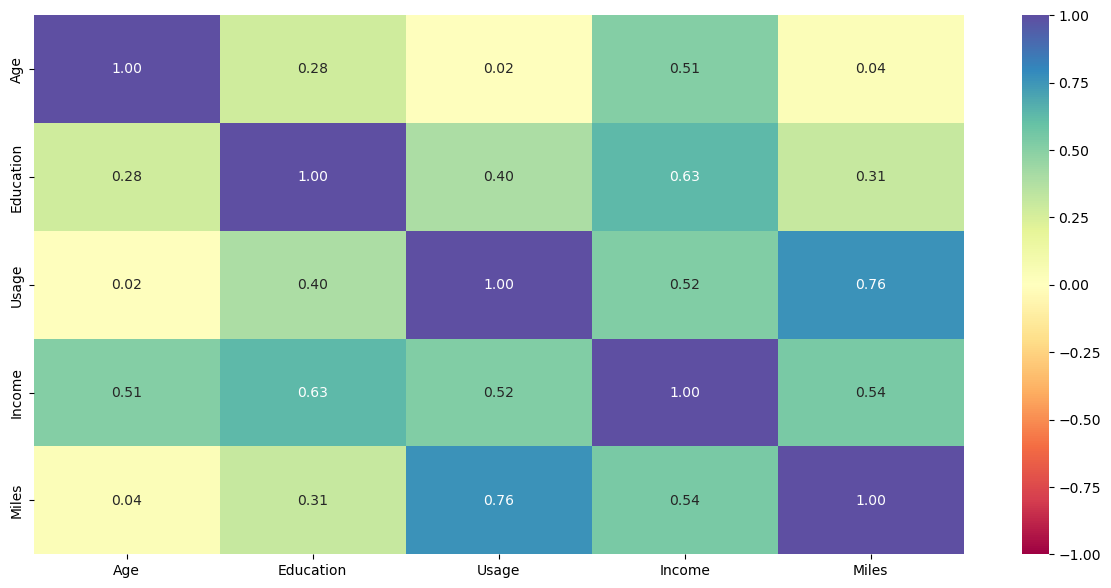

In [71]:
plt.figure(figsize=(15, 7))
sns.heatmap(cardio.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### Observations:
* Usage has high correlation with the Miles run per week. This indicates that more the usage of treadmill will results in more the miles run per week.
* Next, Income and Education has high correlation . This indicates that the customer who has high number of education years getting more income than the person who has less number of education years.
* Correlation between Usage and Income , Income and Miles are positive. However , this is not necessarily to be considered as Income and  does not have direct impact with miles and usage.
* Age has comparatively less correlation with Usage and Miles. This indicates that the age and education is not barrier for fitness

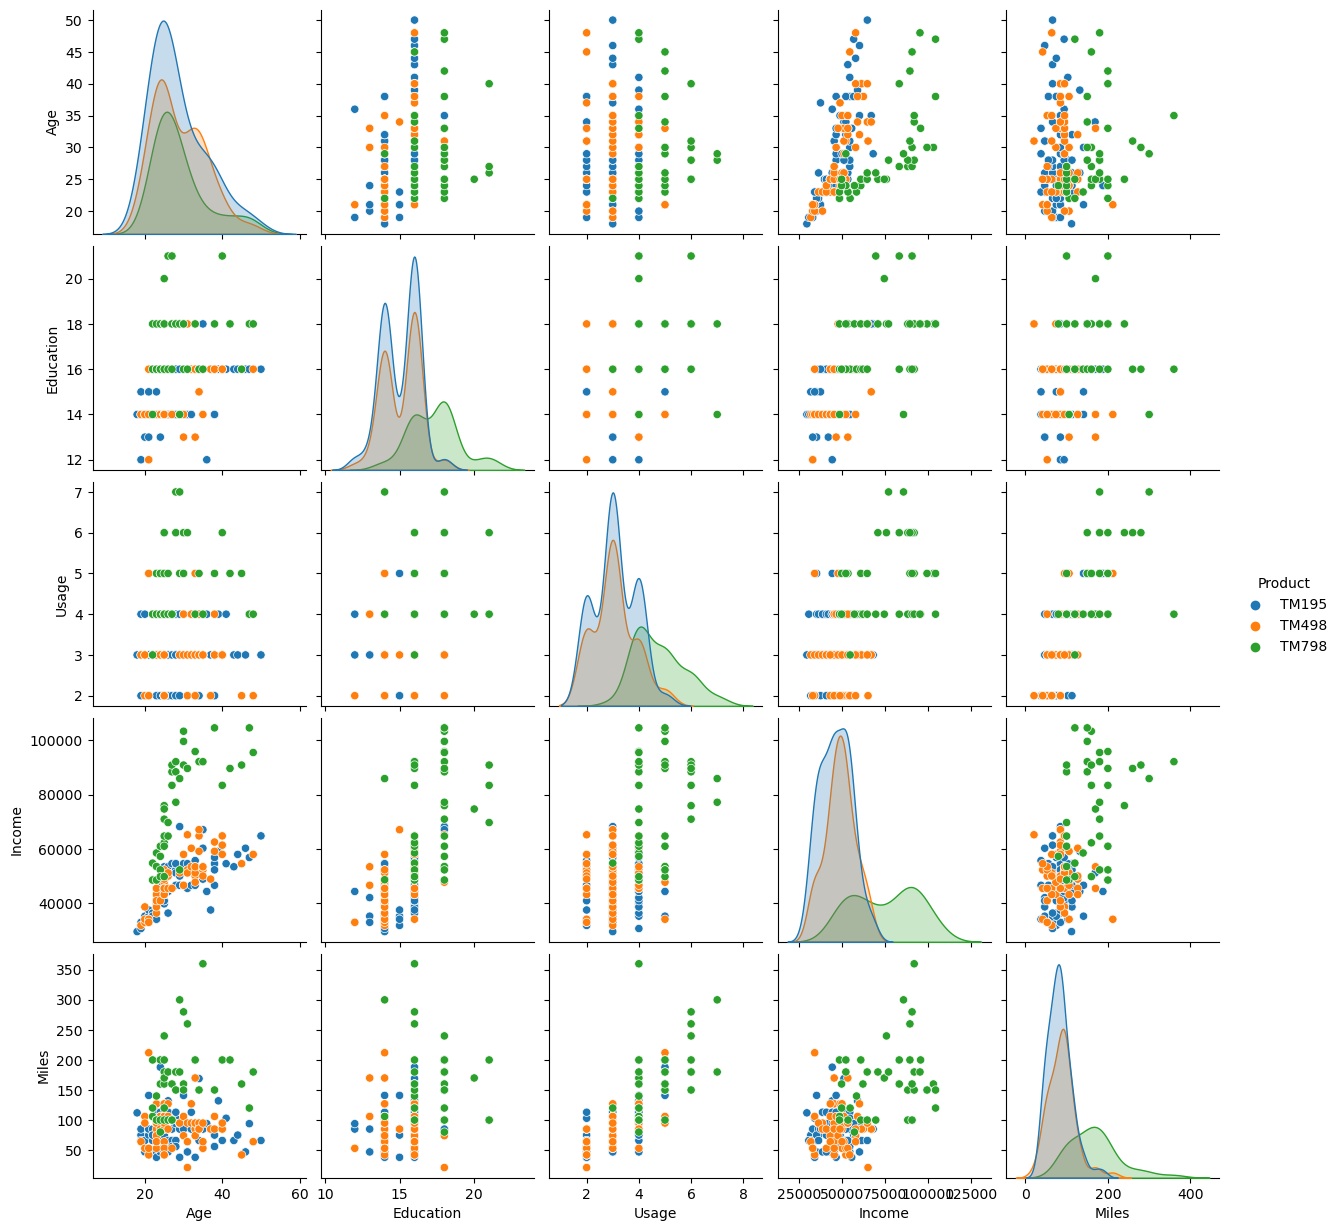

In [120]:
sns.pairplot(data=cardio.drop(["Fitness"],axis=1),hue="Product",diag_kind="kde")
plt.show()

### Observations:
Age and Income has increasing postive trend. This indicates that higher the AGe will get higher income.
Product TM195 is the most used product which is seen in all plots.

### Product vs Age

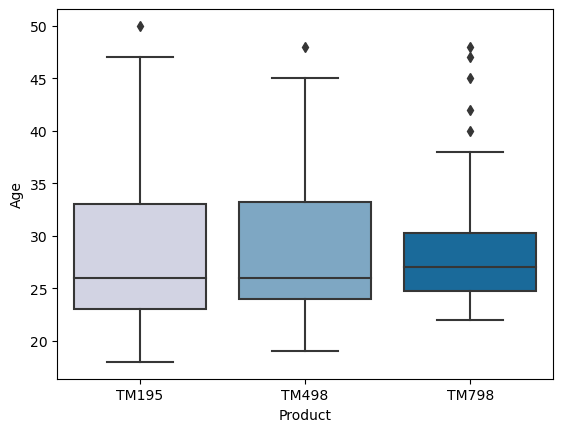

In [144]:

sns.boxplot(data = cardio, x = cardio["Product"], y = cardio["Age"],palette="PuBu")
#sns.histplot(data = cardio, x = cardio["Product"], y = cardio["Age"],palette="PuBu")
plt.show()

### Observations:

There is a subtle difference between median of age group among different models.
Users of model TM798 have more outliers compared to other models, over the age of 37

Product 'TM798' has almost all age group ranging from 15 to 47 with the median age group around 27.IQR range from mid 20 to mid 30s.
Most of the customers use 'TM195' model than TM498 and TM798.

From the plot, we could understand that TM798 is less likely used one


## Product vs Education

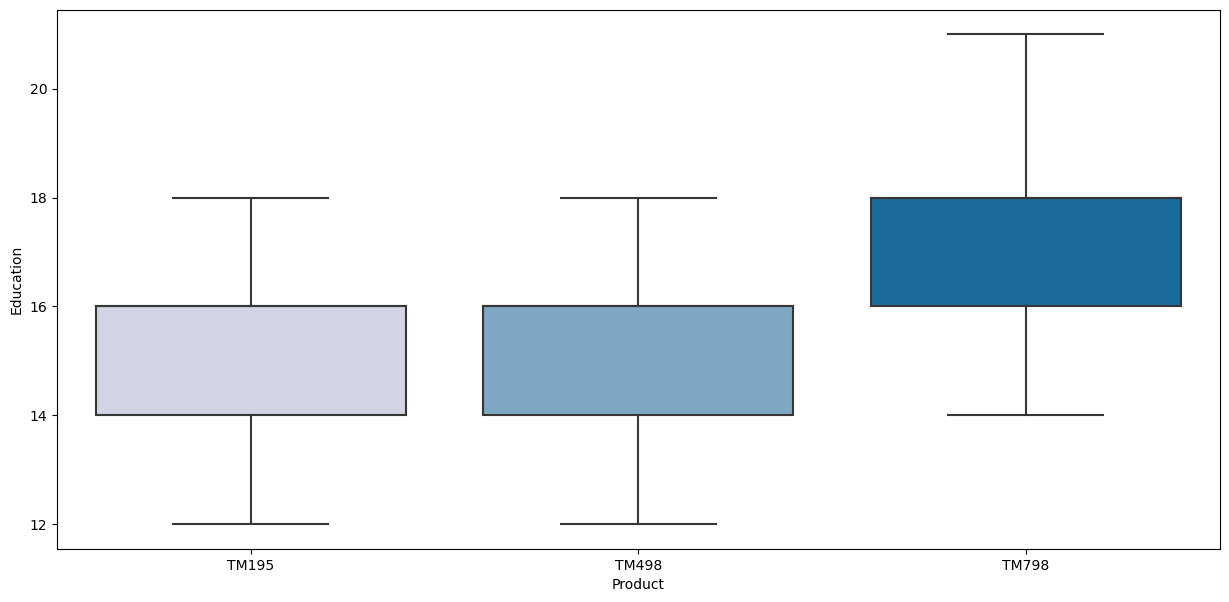

In [77]:
plt.figure(figsize=(15,7))
sns.boxplot(data = cardio, x = cardio["Product"], y = cardio["Education"],palette="PuBu")
plt.show()

### Observations:
TM195 and TM498 are used by the customers mostly with the education years between 12-18.
TM798 is used by the education years range between 14 to above 20.


## Product vs Usage

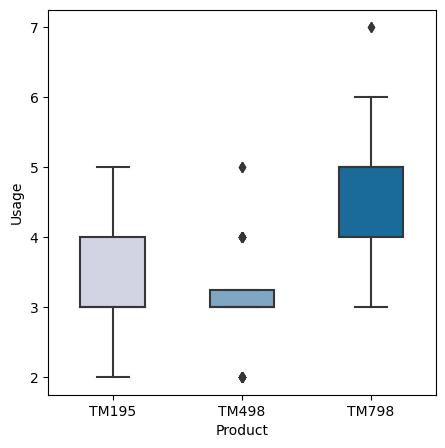

In [149]:
plt.figure(figsize=(5,5))
sns.boxplot(data = cardio, x = cardio["Product"], y = cardio["Usage"],palette="PuBu", width=0.5)
plt.show()

### Observations:
There is a gross difference between usage of different models
Users of TM195 range between 2 to 5 times per week
Users of TM798 have a range between 3 to 6 with outliers using 7 times per week.
TM498 does not have min and max values predominantly have outliers on both sides
Model 'TM498' has many outliers
TM195 is been used between 2 to  max 5 times per week.
However, TM798 has been used min 3 to max 6 times per week . It has one outliner too.


## Product vs Income

### Observations:
Users of TM798 have the highest income. This indicates that the price of the model is TM798 is higher and this model is affordable to the customer with the high income.
TM498 has outliners on both ends

## Product vs Miles

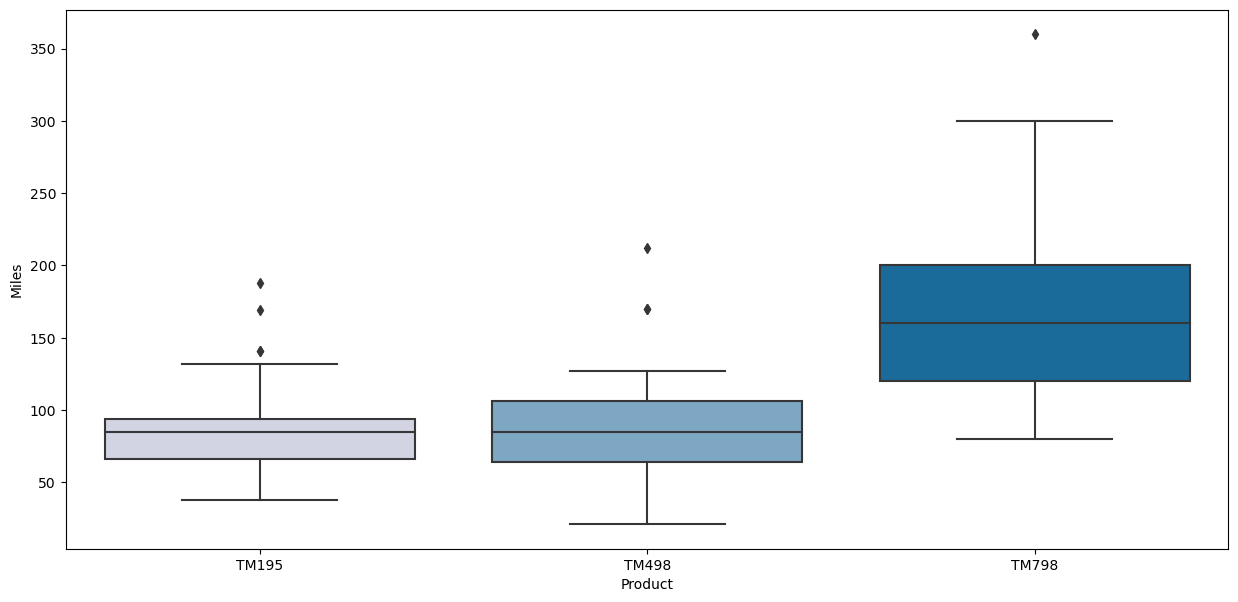

In [80]:
plt.figure(figsize=(15,7))
sns.boxplot(data = cardio, x = cardio["Product"], y = cardio["Miles"],palette="PuBu")
plt.show()

### Observations:
TM798 run maximum miles per week when compared to other models. It has a outlier too
Models TM195 and TM498 run below 150 MIles per week . This indicates the the efficiency of the product is less when compared to TM798
TM195 has few outliers. This indicates few customers used the product beyond average normal usage.

## Product vs Gender

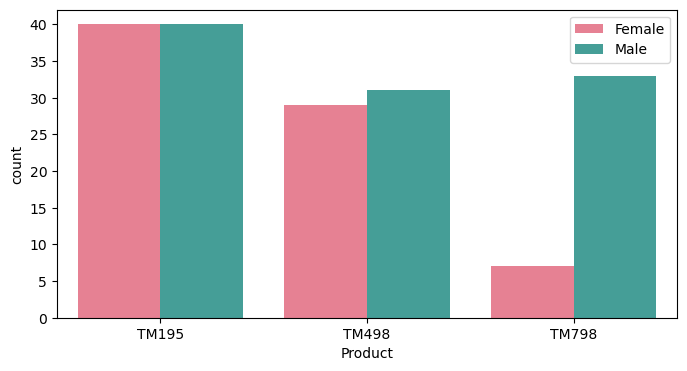

In [139]:
plt.figure(figsize=(8,4))

sns.countplot(data = cardio, x = cardio["Product"],hue=cardio["Gender"],palette='husl')
plt.legend(bbox_to_anchor=(1.00, 1))

plt.show()

### Observations:
TM195 is used by both female and Male.
TM798 is mostly used by Male compared to female.
TM498 is mostly used by Male, and less likely used by female .

## Product vs Marital Status

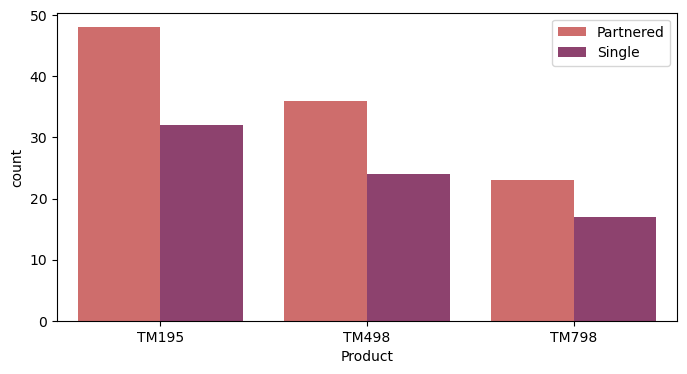

In [137]:
plt.figure(figsize=(8,4))

sns.countplot(data = cardio, x = cardio["Product"],hue=cardio["MaritalStatus"],palette='flare')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

### Observations:
All the three models mostly used by the customers who are Partnered .

## Product vs Fitness

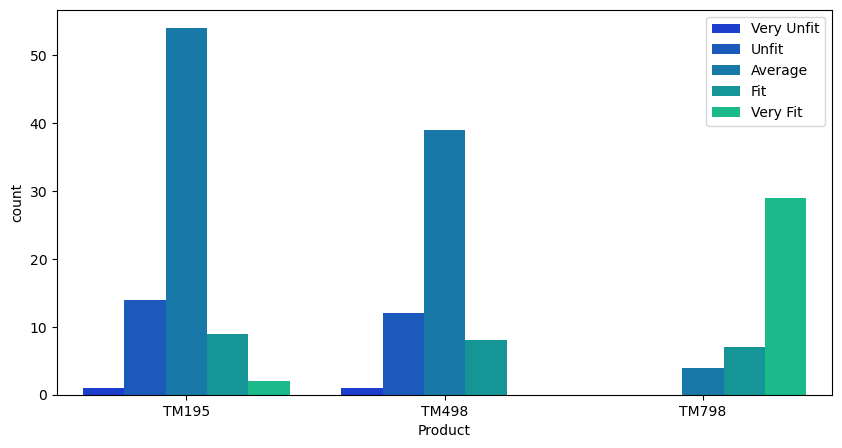

In [141]:
plt.figure(figsize=(10,5))

sns.countplot(data = cardio, x = cardio["Product"],hue=cardio["FitnessRange"],palette='winter')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

### Observations:
TM195 is mostly used by Customers who has 'Average' in fitness scale. They are less likely to be 'Very Fit'
TM498 is next used model with the fitness scale 'Average'. 
TM798 customers are mostly 'Very Fit'.No one is with fitness scale 'Good' or 'Poor' using the model TM798.


### **Multivariate Analysis**

This will help us to understand and cater needs of customers better based on their gender,marital status, Age etc.

## Usage vs Gender vs Marital Status

In [3]:
plt.figure(figsize=(10,7))
sns.boxplot(data = cardio, x = cardio["Gender"], y = cardio["Usage"],hue=cardio["MaritalStatus"],palette="viridis")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

NameError: name 'cardio' is not defined

<Figure size 1000x700 with 0 Axes>

### Observations:
Male :
Both partnered and single male uses maximun of 5 times per week.
Male has three outliners with the usage of 6 and 7 times per week.

Female:
Maximum usage of 6 times per week who are partnered.
Single female use max 5 times per week.

On the whole, more female use the maximum of 6 times per week compared to male

## Gender vs Income vs Marital Status

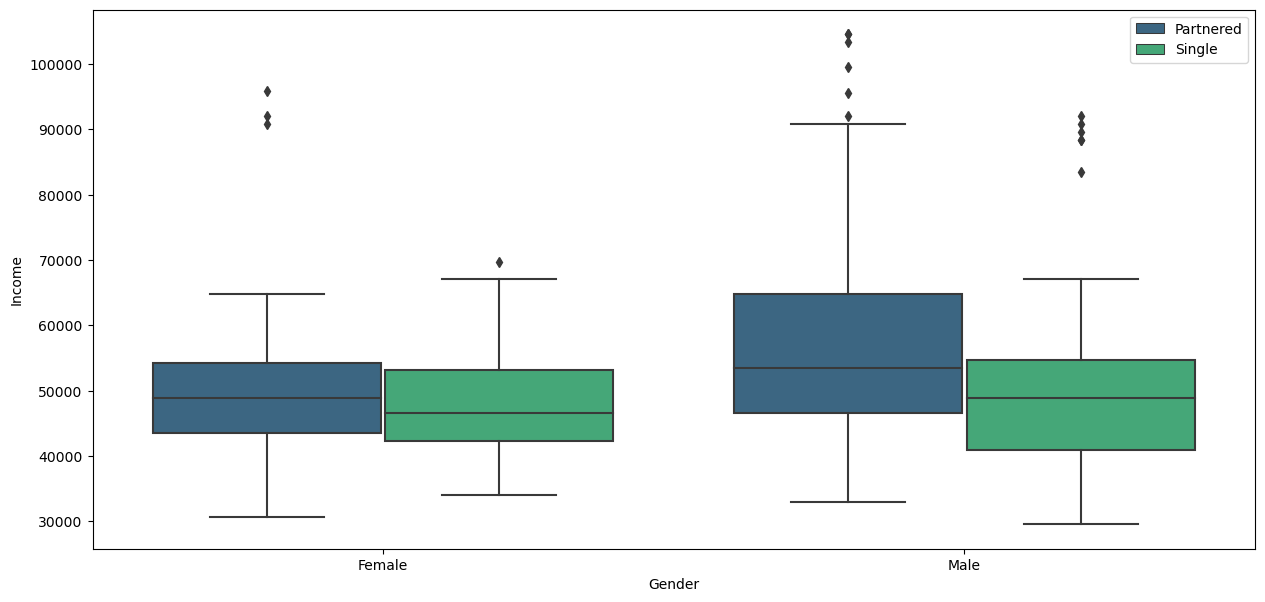

In [80]:
plt.figure(figsize=(15,7))
sns.boxplot(data = cardio, x = cardio["Gender"], y = cardio["Income"],hue=cardio["MaritalStatus"],palette="viridis")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

### Observations:
Male (both single and partnered) has many outliners.
Maximum partnered male has high income compared to single men.
Few outliners in partnered female . Both partnered and single women earn maximum of 70000.

## Gender vs Miles

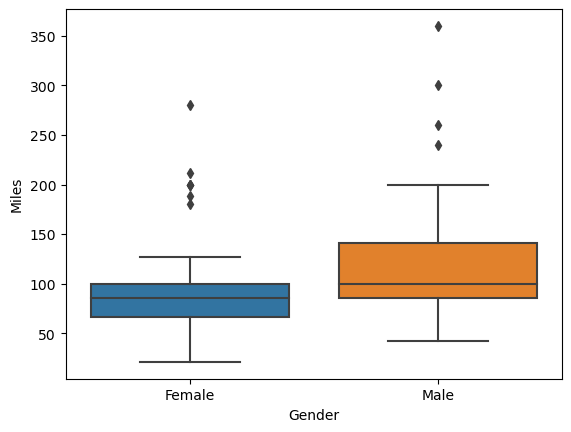

In [82]:
sns.boxplot(data= cardio,x='Gender',y='Miles');

### Observations:
Both Male and female has ouliners .
Male runs more miles per week compared to female.

## Gender vs Miles vs Marital Status

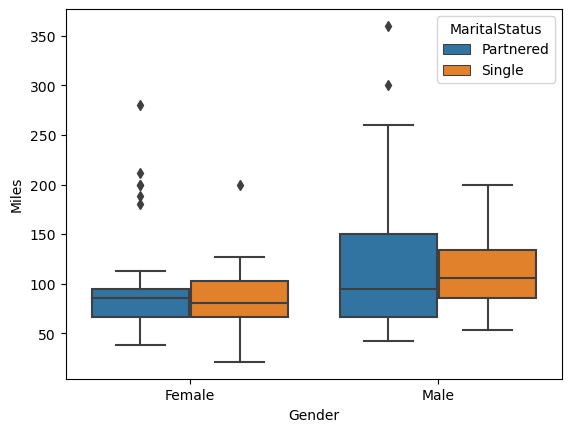

In [83]:
sns.boxplot(data=cardio,x='Gender',y='Miles',hue='MaritalStatus'); 

### Observations:
Partnered Men run maximum miles per week compared to single men.
Partnered man has outliners too

Female(Single)run maximum 130 miles per week, partnered women runs maximum of 115 miles per week.
Both single and partnered women has outliners . However, Partnered woman has many outliners compared to single.

## Gender vs Miles vs Education

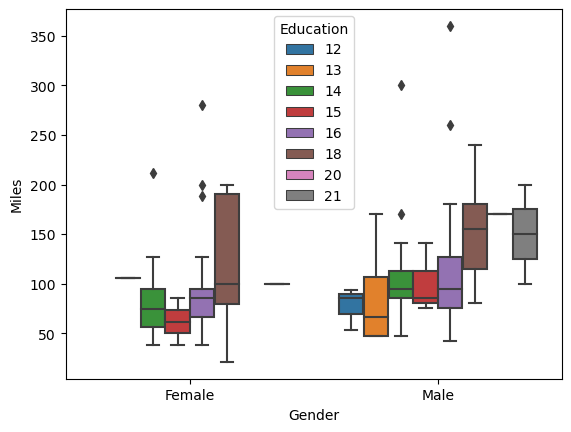

In [86]:
sns.boxplot(data=cardio,x='Gender',y='Miles',hue='Education'); 

### Observations:
Both female and male customers are with the age group 18 uses the treadmill maximum.


## Age vs Miles vs Gender

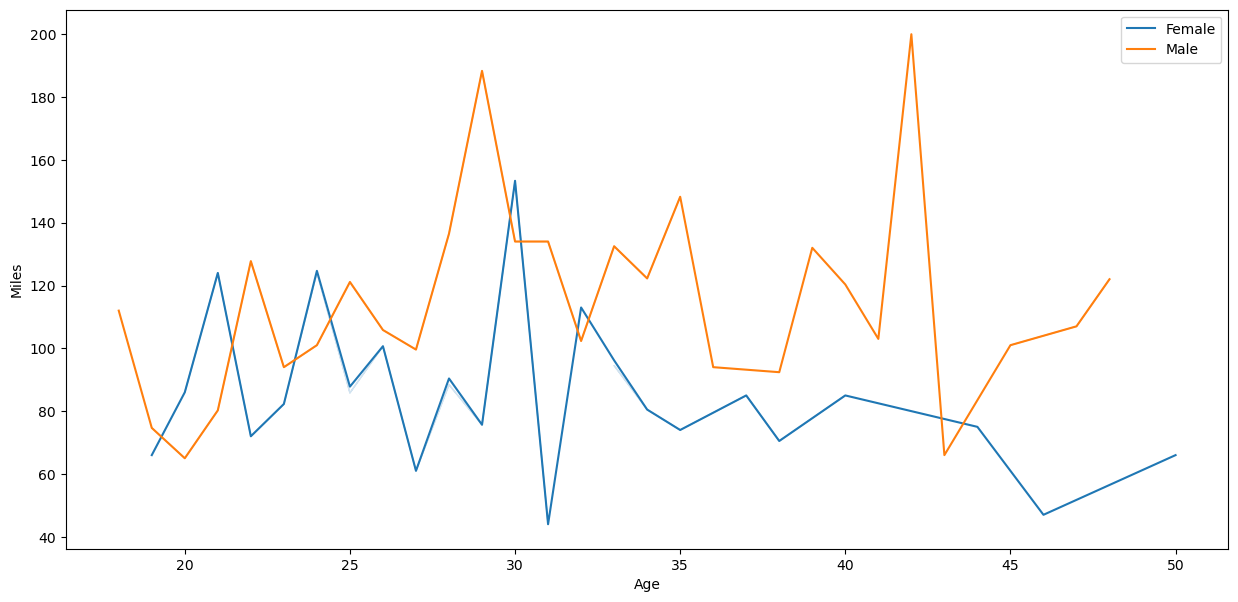

In [85]:
plt.figure(figsize=(15,7))
sns.lineplot(data = cardio, x = cardio["Age"], y = cardio["Miles"],hue=cardio["Gender"],ci=False)
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

### Observations:
Male customers runs maximum miles compared to female customers.
We observe that the increasing trend in Male cusomers age and miles per week.
However , the trend is decresing in case of female customers . As their age is increasing the average miles run by female customers is decreasing . It indicates that the young women runs more miles than elder women.

## Age vs Miles vs Marital Status

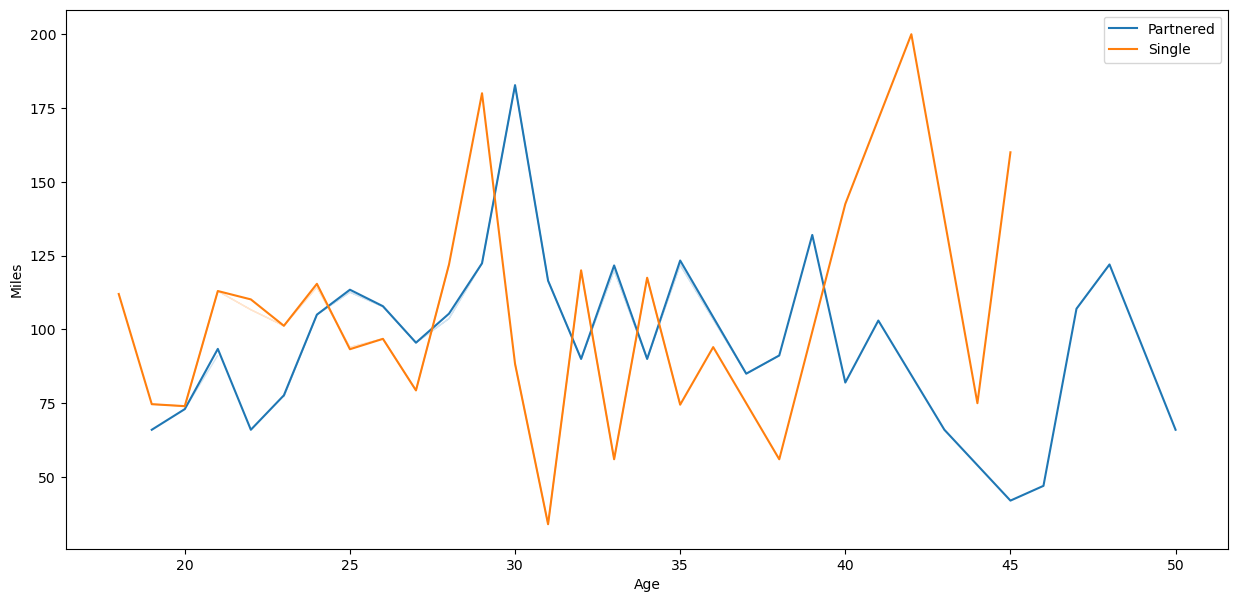

In [88]:
plt.figure(figsize=(15,7))
sns.lineplot(data = cardio, x = cardio["Age"], y = cardio["Miles"],hue=cardio["MaritalStatus"],ci=False)
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

### Observations:
We observe that increasing trend indicates that the customers who are single runs more miles compared to  customers who are 'partnered' 

## Age vs Income vs Product

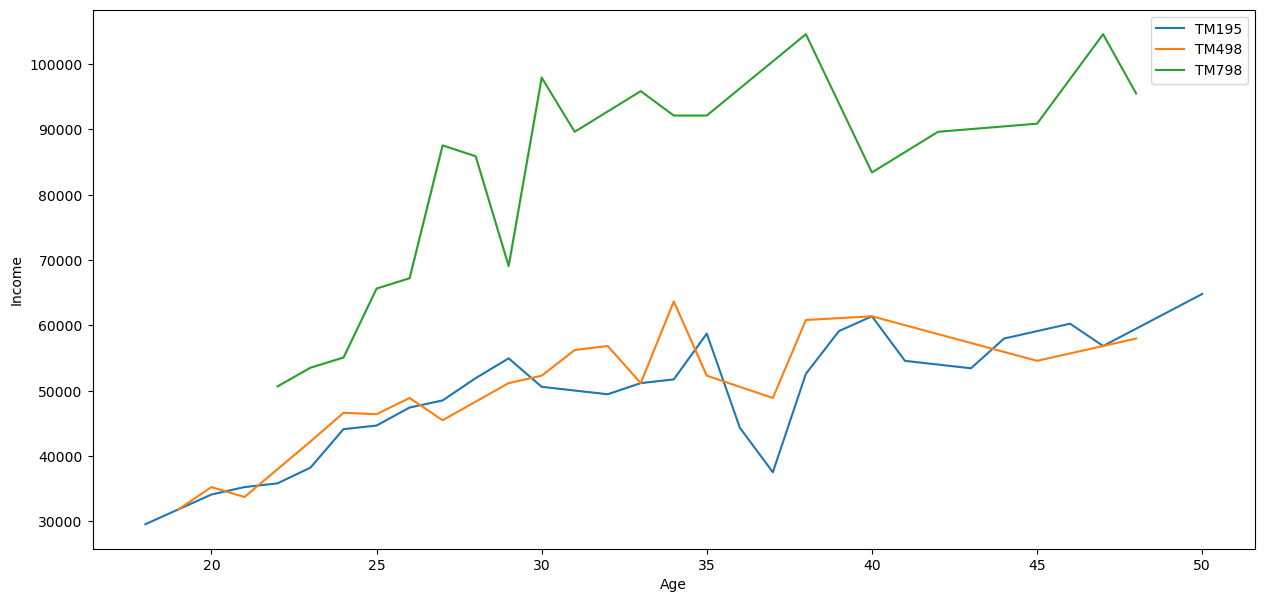

In [89]:
plt.figure(figsize=(15,7))
sns.lineplot(data = cardio, x = cardio["Age"], y = cardio["Income"],hue=cardio["Product"],ci=False)
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

### Observations:
* There is a obvious difference with the customers using TM798 in comparison with the other two models in terms of income
* TM798 seem to be the choice of users with higher income irrespective of age
* TM195 & TM498 users have shown to have a steady increase in the usage as age increases in proportionate with the income,however with a plumeting around late 30s ,only to raise again
* Both TM195 & TM498 users earn below 60000 irrespective of their age group

## Income vs Miles vs Education

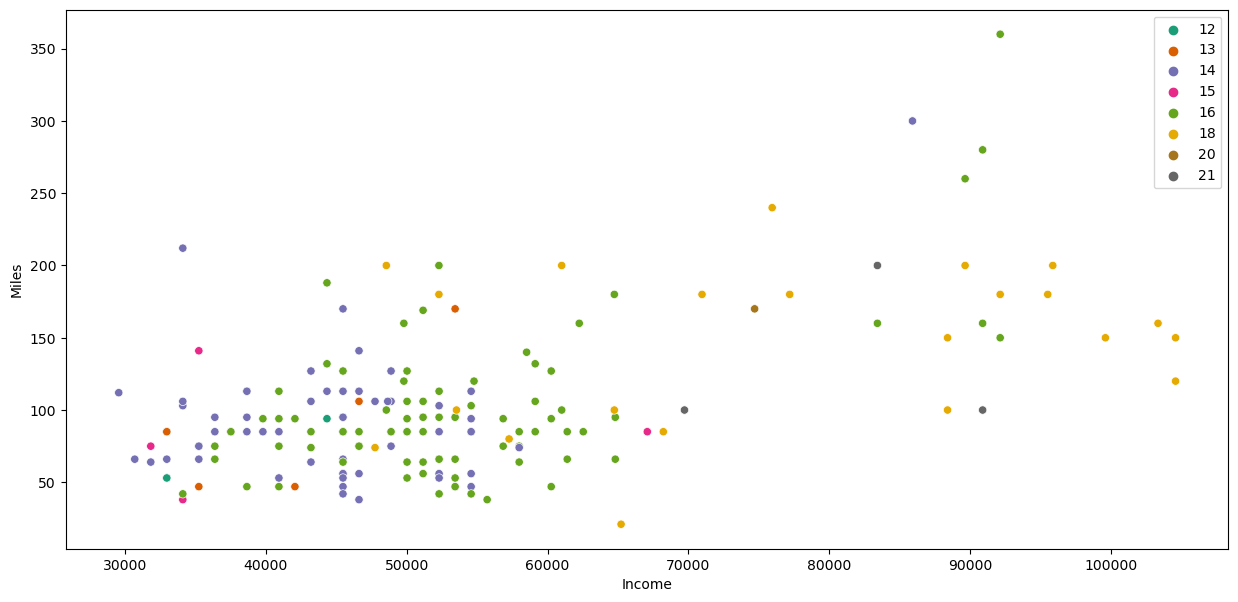

In [72]:
plt.figure(figsize=(15,7))
sns.scatterplot(data = cardio, x  = cardio["Income"], y = cardio["Miles"],hue=cardio["Education"],palette="Dark2")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

### Observations:
Customers with the education years 18 do the lowest miles less than 50 with the income ranging between 60k to 70k.
Customers with the education years 16 do the highest miles more than 350 with the income around 90k.
Most of the customers(all age group) runs 200 miles per week with the income range 30k to 70k

## Income vs Miles vs Product

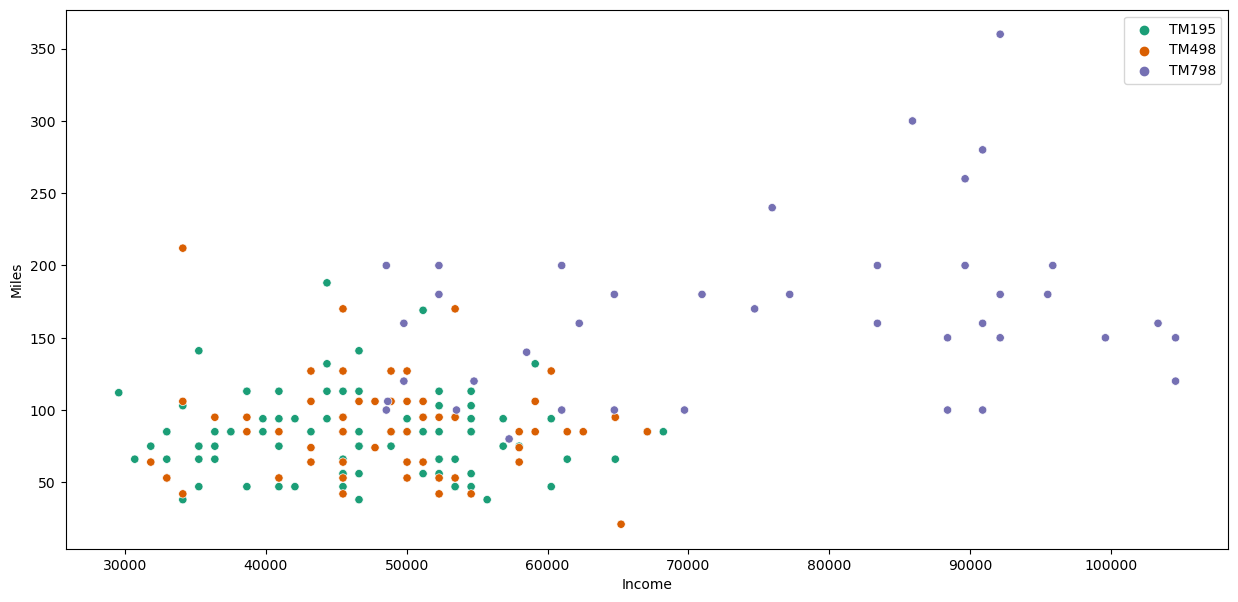

In [90]:
plt.figure(figsize=(15,7))
sns.scatterplot(data = cardio, x  = cardio["Income"], y = cardio["Miles"],hue=cardio["Product"],palette="Dark2")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

### Observation:
TM798 is highly used by the customers with the high income ranging between 70k to above 100k,and runs maximum of 350 miles per week
TM195 and TM498 are mostly used by the customers with the income raning between 30k to 70k, runs maximum of 200 miles per week


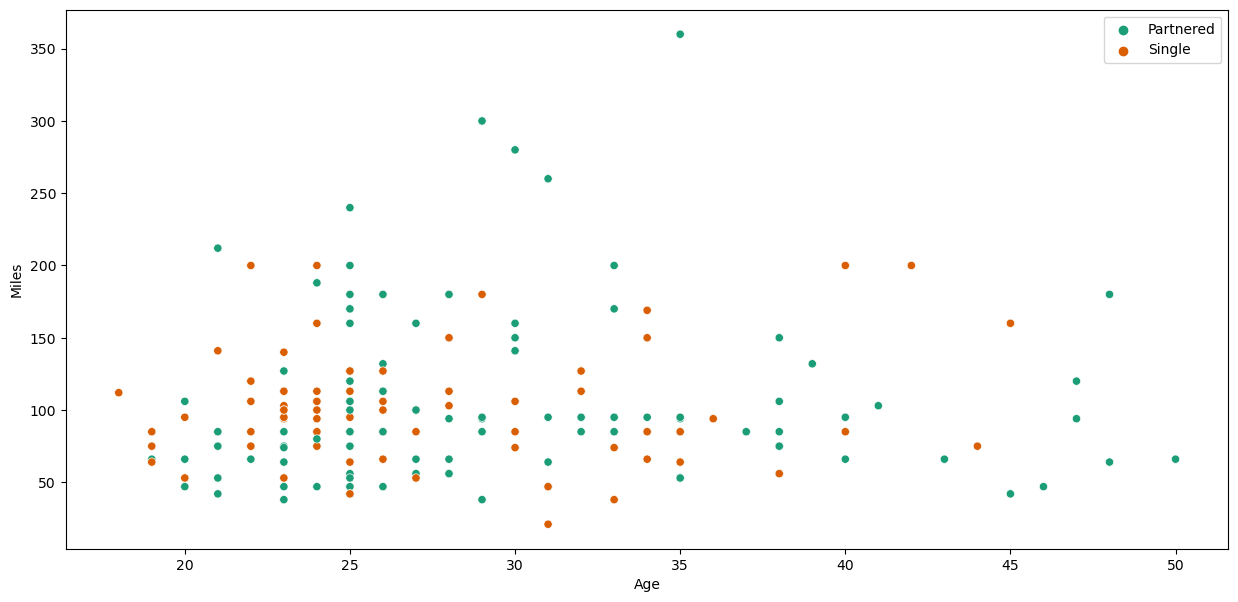

In [92]:
plt.figure(figsize=(15,7))
sns.scatterplot(data = cardio, x  = cardio["Age"], y = cardio["Miles"],hue=cardio["MaritalStatus"],palette="Dark2")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

### Observation:
Most of the customers who are single runs average of 200 miles per week
Customer with the Age 35 (status partnered) runs maximum of 350 miles per week

### **Question 8:** Group the data for each product to build customer profiles and summarize the key characteristics of the customers based on the statistical summary.  [3 marks]

**Grouping data with respect to products to build customer profiles**

In [63]:
cardio[cardio["Product"]=="TM195"].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product,80,1,TM195,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,80.0,NaN,NaN,NaN,28.55,7.221452,18.0,23.0,26.0,33.0,50.0
Gender,80,2,Female,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,80.0,NaN,NaN,NaN,15.0375,1.216383,12.0,14.0,16.0,16.0,18.0
MaritalStatus,80,2,Partnered,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usage,80.0,NaN,NaN,NaN,3.0875,0.782624,2.0,3.0,3.0,4.0,5.0
Fitness,80.0,5.0,3.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,80.0,NaN,NaN,NaN,46418.025,9075.78319,29562.0,38658.0,46617.0,53439.0,68220.0
Miles,80.0,NaN,NaN,NaN,82.7875,28.874102,38.0,66.0,85.0,94.0,188.0
FitnessRange,80,5,Average,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Observations: 
**TM195 Customer**
Most customers use product TM195 which is around 80 out of total 180
Majority of the customers are  around the age of 28 with the eldest users witha age of 50 and youngest 18 which includes both sex
The education years of the customers range between 12 and 18 with an average of 15
48 customers have partners while the rest are single
50% of the Customers use 3 times per week while some use upto a maximum of 5 times of week and some to a minimum of just twice a week
Most of the customers (54 out of 80) are with the average fitness
Income of the customers is ranging between 29K to 68k with an average of 46k
Some customers do a maximum of 188 miles while some just a meagre 38 miles but an average of them do around 82miles per week

In [64]:
## Fill in the blank with appropriate column names and functions
cardio[cardio["Product"]=="TM498"].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product,60,1,TM498,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,60.0,NaN,NaN,NaN,28.9,6.645248,19.0,24.0,26.0,33.25,48.0
Gender,60,2,Male,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,60.0,NaN,NaN,NaN,15.116667,1.222552,12.0,14.0,16.0,16.0,18.0
MaritalStatus,60,2,Partnered,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usage,60.0,NaN,NaN,NaN,3.066667,0.799717,2.0,3.0,3.0,3.25,5.0
Fitness,60.0,4.0,3.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,60.0,NaN,NaN,NaN,48973.65,8653.989388,31836.0,44911.5,49459.5,53439.0,67083.0
Miles,60.0,NaN,NaN,NaN,87.933333,33.263135,21.0,64.0,85.0,106.0,212.0
FitnessRange,60,4,Average,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Observations:
**TM498 Customer**
 A total of 60 out of the 180 seem to use the above mentioned product
 The eldest customers are at 48 and the youngest at 19 with a mean age of 28
 Males and females almost equally use this product with a n average usage of thrice per week
 People with education year of 12 to 18 seem to use the product with a mean education years of around 15
 36 customers seem to have partners and rest are single 
 Majority of the  customers using this product seem to have an average fitness
 Customers using this product have a minimum income of 31k and maximum of 67k with an average of 48k
 Customers have done a minimum of 21 miles to a maximum of 212 miles with a majority of them making around 87 miles in a week
 

In [62]:
cardio[cardio["Product"]=="TM798"].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product,40,1,TM798,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,40.0,NaN,NaN,NaN,29.1,6.971738,22.0,24.75,27.0,30.25,48.0
Gender,40,2,Male,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,40.0,NaN,NaN,NaN,17.325,1.639066,14.0,16.0,18.0,18.0,21.0
MaritalStatus,40,2,Partnered,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usage,40.0,NaN,NaN,NaN,4.775,0.946993,3.0,4.0,5.0,5.0,7.0
Fitness,40.0,3.0,5.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,40.0,NaN,NaN,NaN,75441.575,18505.83672,48556.0,58204.75,76568.5,90886.0,104581.0
Miles,40.0,NaN,NaN,NaN,166.9,60.066544,80.0,120.0,160.0,200.0,360.0
FitnessRange,40,3,Very Fit,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Observations:
**TM798 Customer**

This seems to be the least used product of all three
All customers using this product are quite young with a the youngest at 22 and eldest at 48
Male predominately seem to use this product than their respective female counterparts 
Most customers using this product seem to have partners which ranks around 23
Customers with education years of 21 to a lowest of 14 seem to use this product wiuth a mean education years of around 17
Most customers using this product seem to use this atleast 5 times per week
A chunk of the customers using this product seem to be very fit
This product seem to the choice of elite customers with aa maximum income with a whopping 100k and a minimum of around 48k with a mean sitting at 75k
The stand out in this product is some customers do around 360 miles per week with a mean ranging around 166 miles per week , even the least number of miles in this product is just 60 


#### **Conclusion:

➢ Majority of the users use the product TM195, this indicates that this product is an affordable one and basic model for the people who just started their fitness journey

➢ TM498 is the next affordable one with the slightly high feature than TM498

➢ TM195 & TM498 are mostly used by customers with less education years and TM798 with high education years

➢ TM798 users use the product maximum times in a week compared to the other two

➢ TM195 and TM498 products are mostly used by average income customers while TM798 seem to be the choice of customers with a high earning income
➢ TM798 product users are expected to do maximum miles in a week 

➢ TM798 is mostly used by males while other two are equally split up between both sexes

➢ TM798 users seem to be the most fit ones

➢ TM195 is widely used across all ages

➢ All products are mostly used by customers with partners than single

#### **Recommendations:

❖ TM 195 seems to be most sought product among the customers while TM798 is the least favored one

❖ TM195 with most users looks like the best affordable model for most customers across all age groups ,but could be made more effective to suit the fitnessfreaks

❖ TM798 if not preferred by people with less education years this could probably because if the fact its difficult to understand and operate ,if that's the case an effort could be made to simplify it 

❖ TM798 is an efficient product for very fit male customers who have a high earning income ,but we need to have more data on price to fix an optimum rate in a way it benefits other customers too

❖ There is a steady increase in all products as age increases hence we need to keep up with that demand

❖ As noted elderly and the more earning ones seem to use all treadmills more ,hence a new product could be developed that is economical and easier touse keeping the growing age in mind

❖ TM798 is not preferred by chunk of females , a detailed analysis has to be done to understand the reason behind this and work on it to provide a product that is equally preferred cut across both genders

❖ TM798 is mostly used by young people , changes could be made as such it could favor the elder ones as well

❖ More data should be procured to understand the manufacturing cost and the availability of the treadmill models to recommend the best choice for acustomer weighing all aspects